# 🛍️ Customer Segmentation using K-Means Clustering

## Objective
A retail store wants to understand its customers better to create targeted marketing campaigns.  
We will use **K-Means clustering** to segment customers into distinct groups based on their **Annual Income** and **Spending Score**.

## Dataset
- **Source:** Mall Customers dataset  
- **Columns:**  
  - CustomerID  
  - Gender  
  - Age  
  - Annual Income (k$)  
  - Spending Score (1–100)

## Approach
1. Data Exploration & Visualization  
2. Feature Selection for Clustering  
3. Elbow Method to determine optimal clusters  
4. K-Means Clustering  
5. Visualization of Customer Segments  
6. Business Insights from clusters


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Preview dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Distribution of Age, Annual Income, and Spending Score


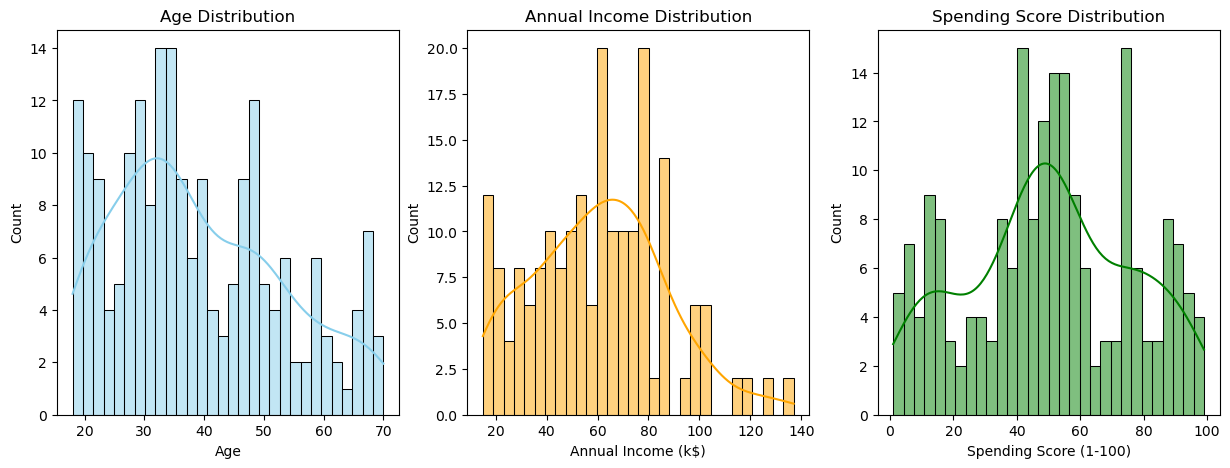

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['Age'], kde=True, bins=30, ax=ax[0], color="skyblue")
ax[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], kde=True, bins=30, ax=ax[1], color="orange")
ax[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30, ax=ax[2], color="green")
ax[2].set_title("Spending Score Distribution")

plt.show()


### Finding the optimal number of clusters using the Elbow Method


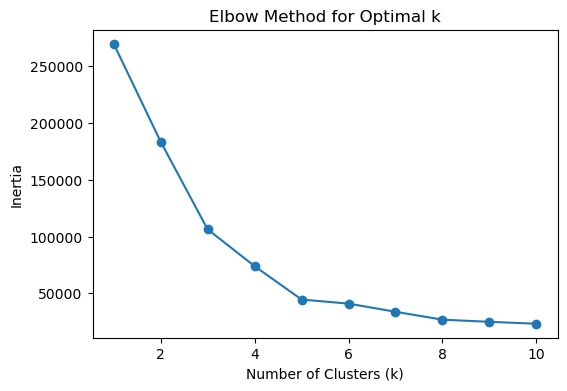

In [8]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


C:\Users\patrick.andrawus\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


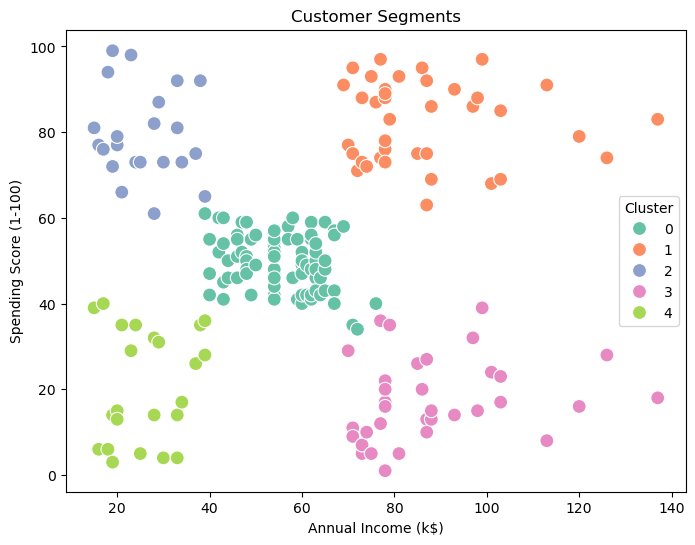

In [4]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Customer Segments")
plt.show()


In [5]:
# Cluster summary
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


### Interpretation of Clusters
- **Cluster 0:** High income, high spending → "VIP Customers"  
- **Cluster 1:** Low income, low spending → "Budget-Conscious Customers"  
- **Cluster 2:** Medium income, medium spending → "Average Customers"  
- **Cluster 3:** High income, low spending → "Careful Spenders"  
- **Cluster 4:** Low income, high spending → "Impulsive Buyers"


## Conclusion
- K-Means successfully segmented customers into **5 clusters**.
- Insights can help the store:
  - Target **VIPs** with loyalty programs
  - Offer discounts to **impulsive buyers**
  - Design budget-friendly products for **careful spenders**

This analysis demonstrates how unsupervised learning can drive **data-driven marketing strategies**.
